# Pair Programming Normalización

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import math 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste.


Happy coding 📈📊📉

In [21]:
sales = pd.read_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales2.csv", index_col= 0)
sales.head(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type,mes,año
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,110.0,160.0,270.0,2,2010-04-01,Coffee,Columbian,Regular,4,2010
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,80.0,130.0,210.0,2,2010-07-01,Coffee,Columbian,Regular,7,2010


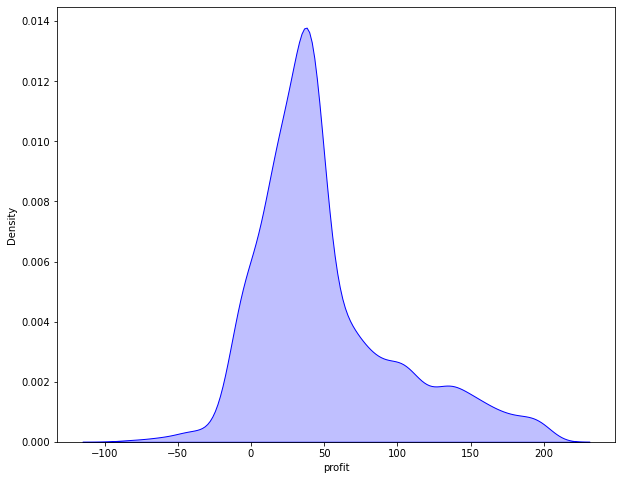

In [22]:

sns.distplot(
    sales["profit"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

Como los datos de nuestra variable respuesta no son normales, procedemos a normalizarlos con el método de la raíz cuadrada, ya que nuestra gráfica se asemeja bastante a la forma de una campana de Gauss.

In [23]:
sales["profit_raiz"] = sales["profit"].apply(lambda x: math.sqrt(x) if x > 0 else 0)

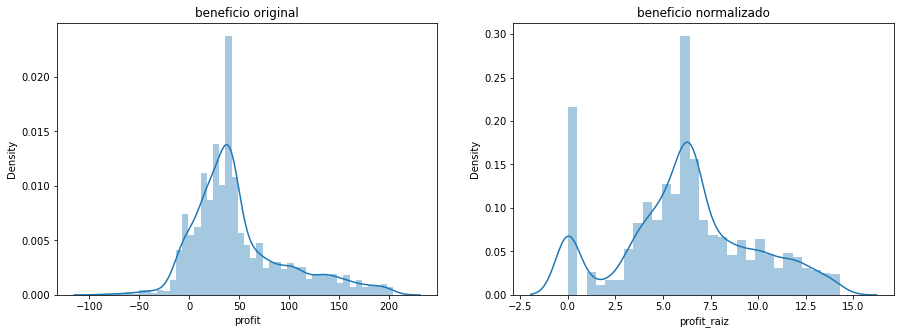

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('beneficio original')
axes[1].set_title('beneficio normalizado')

sns.distplot(sales["profit"] ,ax = axes[0])
sns.distplot(sales["profit_raiz"], ax = axes[1]);

In [25]:
stats.shapiro(sales["profit_raiz"])

ShapiroResult(statistic=0.9654205441474915, pvalue=9.184771189528496e-31)

Según podemos observar, el método de la raíz cuadrada no funciona, suponemos que es porque tenemos valores que son igual a 0. Además, el test Shapiro nos confirma que los datos siguen siendo no normales. Probamos a continuación con el método box-cox.

In [26]:
sales["profit_box"], lambda_ajustada = stats.boxcox(sales["profit"])

ValueError: Data must be positive.

No podemos usar este método, ya que tenemos valores negativos en nuestra columna. Probamos con el método MinMaxScaler.

In [27]:
numericas = sales.select_dtypes(include=np.number)

In [28]:
minmax = MinMaxScaler()

In [29]:
minmax.fit(sales[["profit"]])

MinMaxScaler()

In [30]:
x_normalizadas = minmax.transform(sales[["profit"]])

In [31]:
x_normalizadas.min(axis=0)

array([0.])

In [32]:
x_normalizadas.max(axis=0)

array([1.])

In [33]:
numericas_minmax = pd.DataFrame(x_normalizadas, columns = ["profit_Sklearn"])
numericas_minmax.head(2)

,profit_Sklearn
0,0.667808
1,0.558219


In [34]:
sales["profit_Sklearn"] = numericas_minmax
sales.head(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,...,budget_sales,productid,date,product_type,product,type,mes,año,profit_raiz,profit_Sklearn
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,270.0,2,2010-04-01,Coffee,Columbian,Regular,4,2010,10.344080,0.667808
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,210.0,2,2010-07-01,Coffee,Columbian,Regular,7,2010,8.660254,0.558219


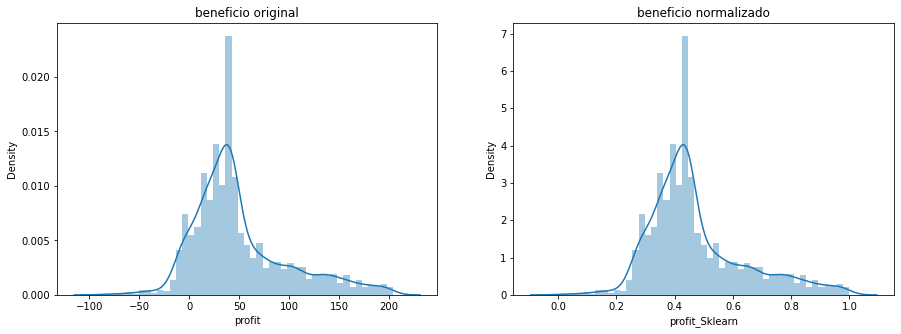

In [35]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('beneficio original')
axes[1].set_title('beneficio normalizado')

sns.distplot(sales["profit"] ,ax = axes[0])
sns.distplot(sales["profit_Sklearn"], ax = axes[1]);

In [36]:
stats.shapiro(sales["profit_Sklearn"])

ShapiroResult(statistic=0.9109619855880737, pvalue=1.8216880036222622e-44)

Como podemos ver en la gráfica comparativa, este método no ha llegado a normalizar los datos, solo ha cambiado la escala de 0 a 1. El test Shapiro nos confirma lo anterior. Conclusión: no conseguimos normalizar nuestra variable respuesta, por lo que deducimos que el modelo de regresión lineal no es el adecuado para este caso.

In [37]:
# eliminamos las columnas que no nos han servido para continuar con el modelo

sales.drop(["profit_raiz", "profit_Sklearn"], axis = 1, inplace=True)

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings.

In [38]:
sales.to_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales3.csv", index=False)